## Deseq2 analysis
This jupyter notebook contains information on how I got Deseq2 installed plus other information.

This is the command to install Deseq2 (via conda install). Make a new conda environment (mine was called deseq2) to install this deseq2 in an isolated environment.

"conda install -c bioconda bioconductor-deseq2"  (run without quotations)

In [1]:
library("DESeq2")
package.version("DESeq2")
#Version says 1.22.1

#activating phyloseq
library("phyloseq")
package.version("phyloseq")
#Version says 1.26.0

library("ggplot2")
packageVersion("ggplot2")
#Package version of ggplot2 is 3.1.0

library("biomformat")
packageVersion("biomformat")
#Package version of biomformat is 1.10.0

library("vegan")
packageVersion('vegan')
#Package version of vegen is 2.5.3

library("grid")
packageVersion('grid')
#Package version of grid is 3.5.1

library(magrittr)
packageVersion('magrittr')
#Package version of magrittr is 1.5

library(dplyr)
packageVersion("dplyr")
#Package version of dplyr is 0.7.8

library(plyr)
packageVersion("plyr")
#Package version of plyr is 1.8.4

library(broom)
packageVersion("broom")
#Package version of broom is 0.5.1

library('stringr')
packageVersion("stringr")
#Package version of stringr is 1.3.1

library('knitr')
packageVersion('knitr')
#Package version of knitr is 1.21

package.version("BiocManager")
#Version says 1.30.4

R.version
#R version is 3.5.1

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min


Attaching packag

[1] "1.18.1"


Attaching package: ‘phyloseq’

The following object is masked from ‘package:SummarizedExperiment’:

    distance

The following object is masked from ‘package:Biobase’:

    sampleNames

The following object is masked from ‘package:GenomicRanges’:

    distance

The following object is masked from ‘package:IRanges’:

    distance



[1] "1.22.3"

[1] ‘3.2.1’

[1] ‘1.6.0’

Loading required package: permute
Loading required package: lattice
This is vegan 2.5-6


[1] ‘2.5.6’

[1] ‘3.4.1’

[1] ‘1.5’


Attaching package: ‘dplyr’

The following object is masked from ‘package:matrixStats’:

    count

The following object is masked from ‘package:Biobase’:

    combine

The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union

The following object is masked from ‘package:GenomeInfoDb’:

    intersect

The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union

The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union

The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[1] ‘0.8.3’

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:matrixStats’:

    count

The following object is masked from ‘package:IRanges’:

    desc

The following object is masked from ‘package:S4Vectors’:

    rename



[1] ‘1.8.4’

[1] ‘0.5.2’

[1] ‘1.4.0’

[1] ‘1.26’

[1] "1.30.10"

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          4.1                         
year           2017                        
month          06                          
day            30                          
svn rev        72865                       
language       R                           
version.string R version 3.4.1 (2017-06-30)
nickname       Single Candle               

## Importing all files and making sure that they are compatibale with the analysis (Pre-Analysis)

In [4]:
#Importing Qiime1 data
biom_all_mice <- import_biom(BIOMfilename = "otu_table_no_singletons-json.biom"
            ,treefilename = "rep_set.tre"
            ,parseFunction = parse_taxonomy_greengenes)

#Importing mapping file
mapping_file <- import_qiime_sample_data(mapfilename = "exp12_metadata_Q1_V3.tsv")

#Merging both mapping file phyloseq object and biom file phyloseq data
phy_main <- merge_phyloseq(biom_all_mice, mapping_file)

#Correcting taxonomic names
#colnames(tax_table(phy_main))= c("Kingdom","Phylum","Class","Order","Family","Genus","Species")

#Showing the taxonomic names of phyloseq object
rank_names(phy_main)

Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_defaul

Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes pre

[1] "Kingdom" "Phylum"  "Class"   "Order"   "Family"  "Genus"   "Species"
[8] "Rank1"

In [5]:
#nsamples() shows the number of samples
print ('Number of Samples in our Biom Table')
nsamples(phy_main)

#ntaxa() shows number of unique OTUs there are 
print ('Number of OTUs we have.')
ntaxa(phy_main)

#sample_sums() shows summary statistics of the sampling depth (sequences per sample)
print ('Summary stats of sequencing depth.')
depths <- sample_sums(phy_main)
summary(depths)

#sort() sorts the phyloseq object. use this to find the sample with the lowest sequences
print("Sample with the lowest amount of sequences")
head(sort(sample_sums(phy_main)),1)

#rank_names() shows the taxa ranks of phylo obj
print("Taxa ranks")
rank_names(phy_main)

#Name of phylo obj shows the components of the obj
print("components of phylo object")
phy_main

#Showing the actual taxa of phy obj
print("First 10 rep taxa from phy obj")
taxtable=tax_table(phy_main)
taxtable[1:10]

[1] "Number of Samples in our Biom Table"


[1] 226

[1] "Number of OTUs we have."


[1] 607

[1] "Summary stats of sequencing depth."


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2092    6842    7980    8055    9210   13210 

[1] "Sample with the lowest amount of sequences"


pcr.control 
       2092

[1] "Taxa ranks"


[1] "Kingdom" "Phylum"  "Class"   "Order"   "Family"  "Genus"   "Species"
[8] "Rank1"

[1] "components of phylo object"


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 607 taxa and 226 samples ]
sample_data() Sample Data:       [ 226 samples by 19 sample variables ]
tax_table()   Taxonomy Table:    [ 607 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 607 tips and 605 internal nodes ]

[1] "First 10 rep taxa from phy obj"


,Kingdom,Phylum,Class,Order,Family,Genus,Species,Rank1
denovo16827,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Oscillospira,NA,NA
denovo84577,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo11984,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo11086,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Dorea,NA,NA
denovo128358,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo51164,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo98968,Bacteria,Firmicutes,Clostridia,Clostridiales,Dehalobacteriaceae,Dehalobacterium,NA,NA
denovo53259,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo116268,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo79849,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA


# Making Deseq2 objects

In [6]:
phy.pt = subset_samples(phy_main, time_point != '0' & time_point != '6' & time_point != '7' & time_point != '8' & time_point != '9' & time_point != '10' & time_point != '11' & time_point != '12' & time_point != '13') # removing time 0
phy.pt.time1 = subset_samples(phy.pt, time_point != '2' & time_point != '3' & time_point != '4' & time_point != '5')
phy.pt.time2 = subset_samples(phy.pt, time_point != '1' & time_point != '3' & time_point != '4' & time_point != '5')
phy.pt.time3 = subset_samples(phy.pt, time_point != '2' & time_point != '1' & time_point != '4' & time_point != '5')
phy.pt.time4 = subset_samples(phy.pt, time_point != '2' & time_point != '3' & time_point != '1' & time_point != '5')
phy.pt.time5 = subset_samples(phy.pt, time_point != '2' & time_point != '3' & time_point != '4' & time_point != '1')

In [7]:
deseq2 <- phyloseq_to_deseq2(phy.pt, ~ Treatment)
deseq2.time1 <- phyloseq_to_deseq2(phy.pt.time1, ~ Treatment)
deseq2.time2 <- phyloseq_to_deseq2(phy.pt.time2, ~ Treatment)
deseq2.time3 <- phyloseq_to_deseq2(phy.pt.time3, ~ Treatment)
deseq2.time4 <- phyloseq_to_deseq2(phy.pt.time4, ~ Treatment)
deseq2.time5 <- phyloseq_to_deseq2(phy.pt.time5, ~ Treatment)

converting counts to integer mode
converting counts to integer mode
converting counts to integer mode
converting counts to integer mode
converting counts to integer mode
converting counts to integer mode


In [8]:
#checking order of deseq2 objects
unique(sample_data(phy.pt.time2)$Treatment)
unique(sample_data(phy.pt.time4)$time_point)

[1] Placebo   Letrozole
Levels: Letrozole Placebo

[1] 4

## All time point

In [10]:
gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}
geoMeans = apply(counts(deseq2), 1, gm_mean)
deseq2 = estimateSizeFactors(deseq2, geoMeans = geoMeans)
deseq2 = DESeq(deseq2, fitType="local")

res = results(deseq2)
res = res[order(res$padj, na.last=NA), ]

sigtab = res
#sigtab = res[(res$padj < alpha), ]
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(phy.pt)[rownames(sigtab), ], "matrix"))
sigtab
head(sigtab, contrasts=list("Placebo","Letrozole"))
write.csv(sigtab, "pvl_all.csv", row.names = TRUE)
res

using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 16 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Kingdom,Phylum,Class,Order,Family,Genus,Species,Rank1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
denovo146153,15.134272,-5.167619,0.5730075,-9.018414,1.908313e-19,8.434744e-17,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo44661,47.645638,-3.786255,0.5059559,-7.483370,7.244077e-14,1.600941e-11,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo10173,528.262916,2.084990,0.2845901,7.326290,2.366111e-13,3.486070e-11,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,NA,NA,NA,NA
denovo128655,4.512846,2.395937,0.3343429,7.166107,7.716040e-13,8.526224e-11,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,NA,NA,NA,NA
denovo106718,6.286951,-4.986244,0.7335742,-6.797191,1.066785e-11,9.430377e-10,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo46779,5.452588,2.214465,0.3387445,6.537270,6.265191e-11,4.615357e-09,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,NA,NA,NA,NA
denovo151435,5.361206,2.028239,0.3119948,6.500873,7.985526e-11,5.042289e-09,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,NA,NA,NA,NA
denovo19145,85.042967,3.002017,0.4838347,6.204635,5.482414e-10,3.029034e-08,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo57942,35.589877,2.315220,0.3893955,5.945678,2.753150e-09,1.352103e-07,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Kingdom,Phylum,Class,Order,Family,Genus,Species,Rank1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
denovo146153,15.134272,-5.167619,0.5730075,-9.018414,1.908313e-19,8.434744e-17,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo44661,47.645638,-3.786255,0.5059559,-7.483370,7.244077e-14,1.600941e-11,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo10173,528.262916,2.084990,0.2845901,7.326290,2.366111e-13,3.486070e-11,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,NA,NA,NA,NA
denovo128655,4.512846,2.395937,0.3343429,7.166107,7.716040e-13,8.526224e-11,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,NA,NA,NA,NA
denovo106718,6.286951,-4.986244,0.7335742,-6.797191,1.066785e-11,9.430377e-10,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo46779,5.452588,2.214465,0.3387445,6.537270,6.265191e-11,4.615357e-09,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,NA,NA,NA,NA


log2 fold change (MLE): Treatment Placebo vs Letrozole 
Wald test p-value: Treatment Placebo vs Letrozole 
DataFrame with 442 rows and 6 columns
               baseMean log2FoldChange     lfcSE         stat       pvalue
              <numeric>      <numeric> <numeric>    <numeric>    <numeric>
denovo146153  15.134272      -5.167619 0.5730075    -9.018414 1.908313e-19
denovo44661   47.645638      -3.786255 0.5059559    -7.483370 7.244077e-14
denovo10173  528.262916       2.084990 0.2845901     7.326290 2.366111e-13
denovo128655   4.512846       2.395937 0.3343429     7.166107 7.716040e-13
denovo106718   6.286951      -4.986244 0.7335742    -6.797191 1.066785e-11
...                 ...            ...       ...          ...          ...
denovo26765   1.5353677   -0.008667385 0.3473297 -0.024954344    0.9800914
denovo99081   0.6565611   -0.009342454 0.4532242 -0.020613318    0.9835541
denovo25578   2.8680561    0.005775307 0.3762555  0.015349428    0.9877534
denovo141008  1.1042059   -0.0

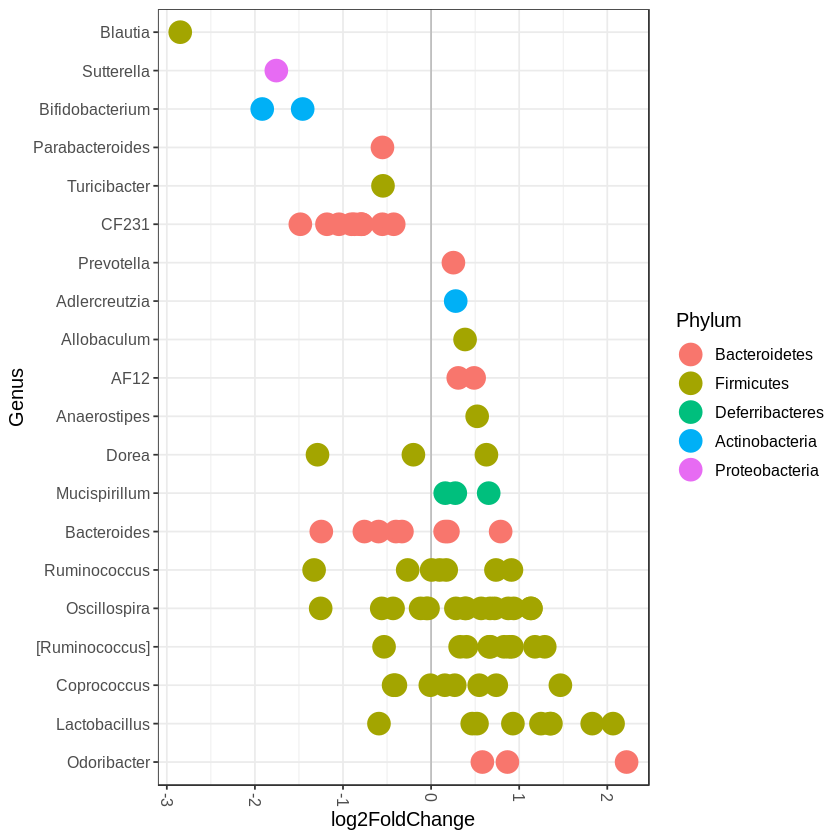

In [11]:
library("ggplot2")
#pdf('~/Desktop/pre_5weeks.pdf', width=32, height=20)
theme_set(theme_bw())
sigtabgen = subset(sigtab, !is.na(Genus)) #Top genus with abs log2fold and p value
# Phylum order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Phylum, function(x) max(x))
x = sort(x, TRUE)
sigtabgen$Phylum = factor(as.character(sigtabgen$Phylum), levels=names(x))
# Genus order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Genus, function(x) max(x))
x = sort(x, TRUE)
sigtabgen$Genus = factor(as.character(sigtabgen$Genus), levels=names(x))
ggplot(sigtabgen, aes(y=Genus, x=log2FoldChange, color=Phylum)) + 
  geom_vline(xintercept = 0.0, color = "gray", size = 0.5) +
  geom_point(size=6) +
  theme(text= element_text(size=12),axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))

## Time 1

In [12]:
gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}
geoMeans = apply(counts(deseq2.time1), 1, gm_mean)
deseq2.time1 = estimateSizeFactors(deseq2.time1, geoMeans = geoMeans)
deseq2.time1 = DESeq(deseq2.time1, fitType="local")

res = results(deseq2.time1)
res = res[order(res$padj, na.last=NA), ]

sigtab = res
#sigtab = res[(res$padj < alpha), ]
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(phy.pt.time1)[rownames(sigtab), ], "matrix"))
sigtab
head(sigtab, contrasts=list("Placebo","Letrozole"))
write.csv(sigtab, "pvl_time1.csv", row.names = TRUE)
res

using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 25 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Kingdom,Phylum,Class,Order,Family,Genus,Species,Rank1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
denovo4701,160.018586,4.333436,0.8539521,5.074565,3.883833e-07,9.709581e-05,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,NA,NA
denovo10173,714.716296,3.213469,0.7045095,4.561285,5.084143e-06,6.355179e-04,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,NA,NA,NA,NA
denovo128655,7.214098,3.332941,0.8153311,4.087837,4.354131e-05,3.628443e-03,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,NA,NA,NA,NA
denovo46779,8.838985,3.139640,0.8271012,3.795956,1.470757e-04,9.192232e-03,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,NA,NA,NA,NA
denovo52943,2.000416,3.629126,0.9858543,3.681199,2.321399e-04,1.160699e-02,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,NA,NA,NA,NA
denovo151435,6.925714,2.716077,0.7556513,3.594352,3.251994e-04,1.354998e-02,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,NA,NA,NA,NA
denovo79490,13.513141,3.369349,0.9639735,3.495271,4.735809e-04,1.691360e-02,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,NA,NA,NA
denovo45929,1.178469,3.677943,1.1050879,3.328191,8.741191e-04,2.701585e-02,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo2846,3.749967,3.521409,1.0676296,3.298344,9.725705e-04,2.701585e-02,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,NA,NA,NA,NA


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Kingdom,Phylum,Class,Order,Family,Genus,Species,Rank1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
denovo4701,160.018586,4.333436,0.8539521,5.074565,3.883833e-07,9.709581e-05,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,NA,NA
denovo10173,714.716296,3.213469,0.7045095,4.561285,5.084143e-06,6.355179e-04,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,NA,NA,NA,NA
denovo128655,7.214098,3.332941,0.8153311,4.087837,4.354131e-05,3.628443e-03,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,NA,NA,NA,NA
denovo46779,8.838985,3.139640,0.8271012,3.795956,1.470757e-04,9.192232e-03,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,NA,NA,NA,NA
denovo52943,2.000416,3.629126,0.9858543,3.681199,2.321399e-04,1.160699e-02,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,NA,NA,NA,NA
denovo151435,6.925714,2.716077,0.7556513,3.594352,3.251994e-04,1.354998e-02,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,NA,NA,NA,NA


log2 fold change (MLE): Treatment Placebo vs Letrozole 
Wald test p-value: Treatment Placebo vs Letrozole 
DataFrame with 250 rows and 6 columns
               baseMean log2FoldChange     lfcSE         stat       pvalue
              <numeric>      <numeric> <numeric>    <numeric>    <numeric>
denovo4701   160.018586       4.333436 0.8539521     5.074565 3.883833e-07
denovo10173  714.716296       3.213469 0.7045095     4.561285 5.084143e-06
denovo128655   7.214098       3.332941 0.8153311     4.087837 4.354131e-05
denovo46779    8.838985       3.139640 0.8271012     3.795956 1.470757e-04
denovo52943    2.000416       3.629126 0.9858543     3.681199 2.321399e-04
...                 ...            ...       ...          ...          ...
denovo37493   10.543483    0.024544495 0.4840389  0.050707691    0.9595584
denovo141854   1.405406   -0.041796660 0.8995611 -0.046463390    0.9629409
denovo19145   23.025037   -0.007673815 0.7821223 -0.009811528    0.9921717
denovo13487    2.288104    0.0

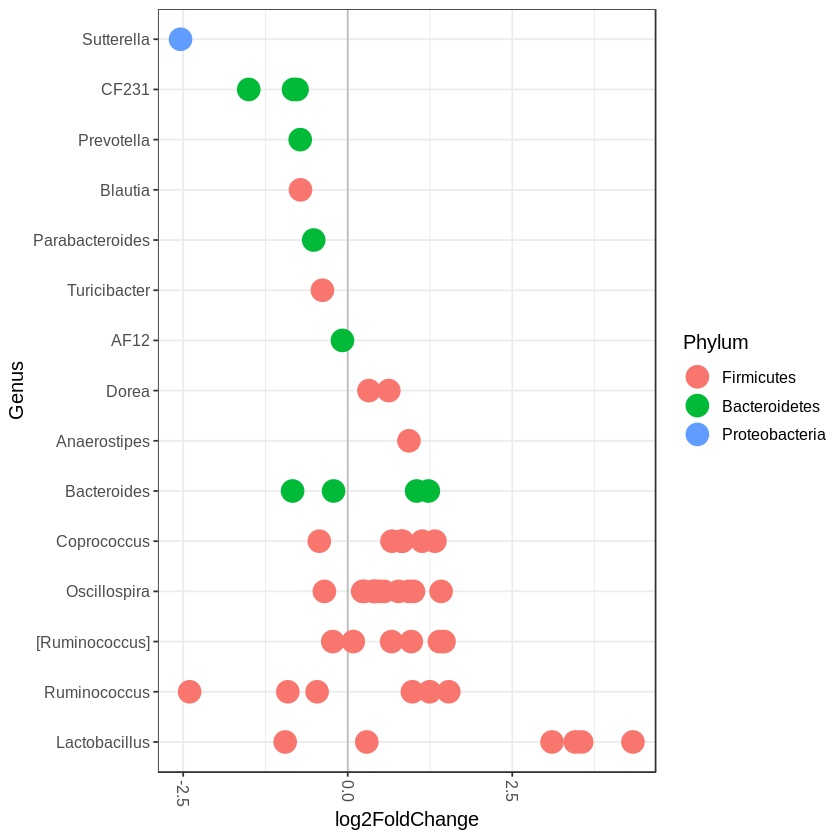

In [13]:
library("ggplot2")
#pdf('~/Desktop/pre_5weeks.pdf', width=32, height=20)
theme_set(theme_bw())
sigtabgen = subset(sigtab, !is.na(Genus)) #Top genus with abs log2fold and p value
# Phylum order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Phylum, function(x) max(x))
x = sort(x, TRUE)
sigtabgen$Phylum = factor(as.character(sigtabgen$Phylum), levels=names(x))
# Genus order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Genus, function(x) max(x))
x = sort(x, TRUE)
sigtabgen$Genus = factor(as.character(sigtabgen$Genus), levels=names(x))
ggplot(sigtabgen, aes(y=Genus, x=log2FoldChange, color=Phylum)) + 
  geom_vline(xintercept = 0.0, color = "gray", size = 0.5) +
  geom_point(size=6) +
  theme(text= element_text(size=12),axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))

## Time 2

In [14]:
gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}
geoMeans = apply(counts(deseq2.time2), 1, gm_mean)
deseq2.time2 = estimateSizeFactors(deseq2.time2, geoMeans = geoMeans)
deseq2.time2 = DESeq(deseq2.time2, fitType="local")

res = results(deseq2.time2)
res = res[order(res$padj, na.last=NA), ]

sigtab = res
#sigtab = res[(res$padj < alpha), ]
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(phy.pt.time2)[rownames(sigtab), ], "matrix"))
sigtab
head(sigtab, contrasts=list("Placebo","Letrozole"))
write.csv(sigtab, "pvl_time2.csv", row.names = TRUE)
res

using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 17 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Kingdom,Phylum,Class,Order,Family,Genus,Species,Rank1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
denovo146153,22.4415013,-5.610762,1.2494094,-4.490732,7.097888e-06,0.002306814,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo4701,119.3711111,3.210067,0.8442065,3.802466,1.432629e-04,0.023280217,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,NA,NA
denovo18221,7.0966800,-5.539503,1.5711895,-3.525675,4.224053e-04,0.027456344,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Oscillospira,NA,NA
denovo135866,6.2041842,5.307222,1.5003175,3.537399,4.040887e-04,0.027456344,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo96589,48.5722282,-1.729943,0.4796791,-3.606460,3.104029e-04,0.027456344,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo63815,41.0242032,-3.531900,1.0356380,-3.410362,6.487681e-04,0.035106870,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo79490,7.0395944,3.383127,1.0078372,3.356819,7.884464e-04,0.035106870,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,NA,NA,NA
denovo139763,138.3840656,2.831577,0.8499714,3.331379,8.641691e-04,0.035106870,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,NA,NA
denovo14801,97.3520846,2.188372,0.6684652,3.273726,1.061396e-03,0.038328203,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Kingdom,Phylum,Class,Order,Family,Genus,Species,Rank1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
denovo146153,22.441501,-5.610762,1.2494094,-4.490732,7.097888e-06,0.002306814,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo4701,119.371111,3.210067,0.8442065,3.802466,1.432629e-04,0.023280217,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,NA,NA
denovo18221,7.096680,-5.539503,1.5711895,-3.525675,4.224053e-04,0.027456344,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Oscillospira,NA,NA
denovo135866,6.204184,5.307222,1.5003175,3.537399,4.040887e-04,0.027456344,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo96589,48.572228,-1.729943,0.4796791,-3.606460,3.104029e-04,0.027456344,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo63815,41.024203,-3.531900,1.0356380,-3.410362,6.487681e-04,0.035106870,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA


log2 fold change (MLE): Treatment Placebo vs Letrozole 
Wald test p-value: Treatment Placebo vs Letrozole 
DataFrame with 325 rows and 6 columns
               baseMean log2FoldChange     lfcSE         stat       pvalue
              <numeric>      <numeric> <numeric>    <numeric>    <numeric>
denovo146153  22.441501      -5.610762 1.2494094    -4.490732 7.097888e-06
denovo4701   119.371111       3.210067 0.8442065     3.802466 1.432629e-04
denovo18221    7.096680      -5.539503 1.5711895    -3.525675 4.224053e-04
denovo135866   6.204184       5.307222 1.5003175     3.537399 4.040887e-04
denovo96589   48.572228      -1.729943 0.4796791    -3.606460 3.104029e-04
...                 ...            ...       ...          ...          ...
denovo5649     2.945981   -0.018356912 0.6696841 -0.027411301    0.9781317
denovo69762    1.969617    0.018271964 0.6864063  0.026619749    0.9787630
denovo47738   27.845056    0.015400319 0.7713314  0.019965892    0.9840706
denovo118503   1.240037   -0.0

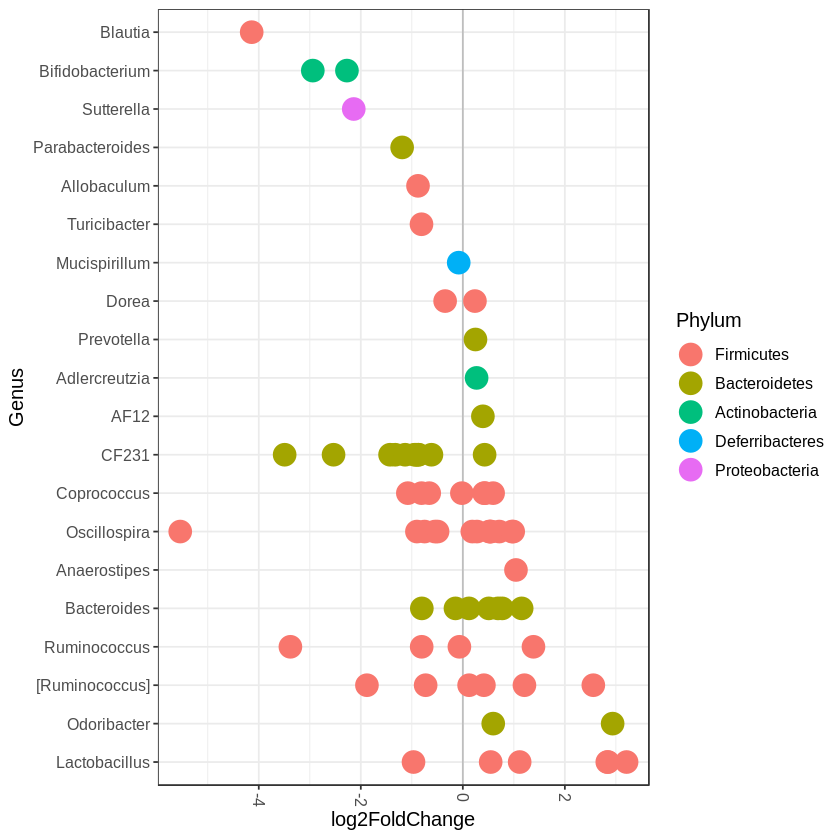

In [15]:
library("ggplot2")
#pdf('~/Desktop/pre_5weeks.pdf', width=32, height=20)
theme_set(theme_bw())
sigtabgen = subset(sigtab, !is.na(Genus)) #Top genus with abs log2fold and p value
# Phylum order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Phylum, function(x) max(x))
x = sort(x, TRUE)
sigtabgen$Phylum = factor(as.character(sigtabgen$Phylum), levels=names(x))
# Genus order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Genus, function(x) max(x))
x = sort(x, TRUE)
sigtabgen$Genus = factor(as.character(sigtabgen$Genus), levels=names(x))
ggplot(sigtabgen, aes(y=Genus, x=log2FoldChange, color=Phylum)) + 
  geom_vline(xintercept = 0.0, color = "gray", size = 0.5) +
  geom_point(size=6) +
  theme(text= element_text(size=12),axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))

## Time 3

In [16]:
gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}
geoMeans = apply(counts(deseq2.time3), 1, gm_mean)
deseq2.time3 = estimateSizeFactors(deseq2.time3, geoMeans = geoMeans)
deseq2.time3 = DESeq(deseq2.time3, fitType="local")

res = results(deseq2.time3)
res = res[order(res$padj, na.last=NA), ]

sigtab = res
#sigtab = res[(res$padj < alpha), ]
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(phy.pt.time3)[rownames(sigtab), ], "matrix"))
sigtab
head(sigtab, contrasts=list("Placebo","Letrozole"))
write.csv(sigtab, "pvl_time3.csv", row.names = TRUE)
res

using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 22 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Kingdom,Phylum,Class,Order,Family,Genus,Species,Rank1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
denovo19145,100.994324,4.763811,0.9653569,4.934766,8.024686e-07,0.0001564814,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo45611,432.177984,1.993172,0.4602007,4.331092,1.483714e-05,0.0014466211,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo146153,10.133117,-5.051522,1.2651213,-3.992915,6.526593e-05,0.0042422852,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo155169,307.383563,3.361606,0.8705656,3.861404,1.127372e-04,0.0054959402,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo38044,7.993106,2.529526,0.7166783,3.529514,4.163236e-04,0.0135305174,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo44661,79.577993,-4.075791,1.1487836,-3.547919,3.882878e-04,0.0135305174,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo96589,61.973749,-1.701950,0.4958587,-3.432328,5.984243e-04,0.0166703898,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo80874,2.807182,3.296219,0.9756420,3.378513,7.287900e-04,0.0177642566,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Oscillospira,NA,NA
denovo24794,5.243827,4.300507,1.2946685,3.321705,8.946913e-04,0.0193849783,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Kingdom,Phylum,Class,Order,Family,Genus,Species,Rank1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
denovo19145,100.994324,4.763811,0.9653569,4.934766,8.024686e-07,0.0001564814,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo45611,432.177984,1.993172,0.4602007,4.331092,1.483714e-05,0.0014466211,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo146153,10.133117,-5.051522,1.2651213,-3.992915,6.526593e-05,0.0042422852,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo155169,307.383563,3.361606,0.8705656,3.861404,1.127372e-04,0.0054959402,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo38044,7.993106,2.529526,0.7166783,3.529514,4.163236e-04,0.0135305174,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo44661,79.577993,-4.075791,1.1487836,-3.547919,3.882878e-04,0.0135305174,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA


log2 fold change (MLE): Treatment Placebo vs Letrozole 
Wald test p-value: Treatment Placebo vs Letrozole 
DataFrame with 195 rows and 6 columns
               baseMean log2FoldChange     lfcSE        stat       pvalue
              <numeric>      <numeric> <numeric>   <numeric>    <numeric>
denovo19145  100.994324       4.763811 0.9653569    4.934766 8.024686e-07
denovo45611  432.177984       1.993172 0.4602007    4.331092 1.483714e-05
denovo146153  10.133117      -5.051522 1.2651213   -3.992915 6.526593e-05
denovo155169 307.383563       3.361606 0.8705656    3.861404 1.127372e-04
denovo38044    7.993106       2.529526 0.7166783    3.529514 4.163236e-04
...                 ...            ...       ...         ...          ...
denovo147464  31.716410     0.06399135 0.8230831  0.07774591    0.9380302
denovo54903    2.616240    -0.05663489 0.7333677 -0.07722577    0.9384439
denovo139763  41.882082    -0.05229473 0.6553310 -0.07979897    0.9363971
denovo32367    7.482802     0.07002021 1.

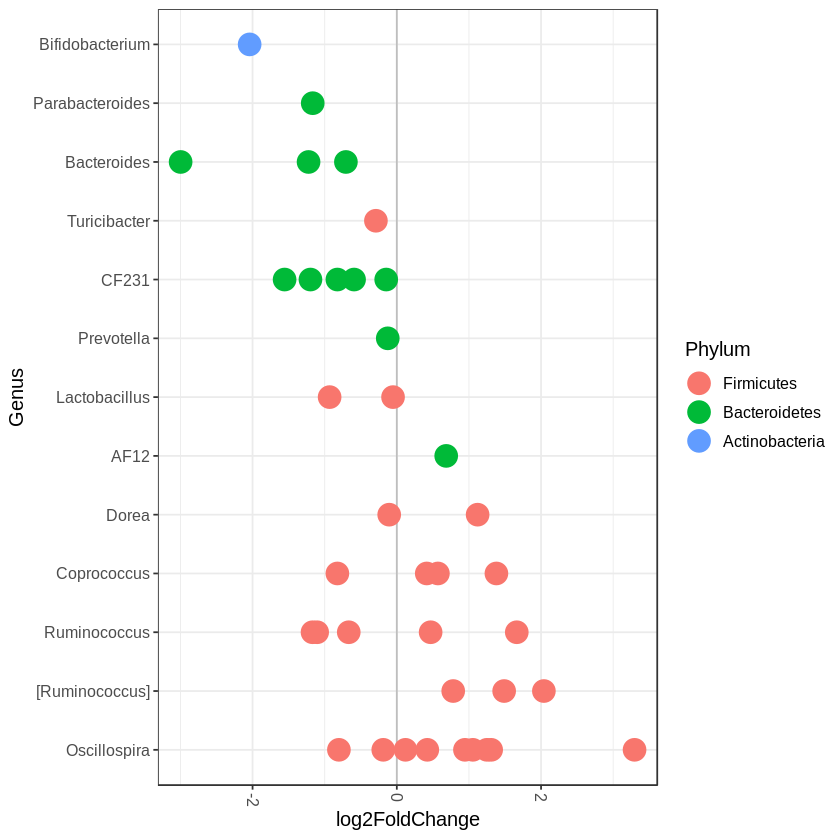

In [17]:
library("ggplot2")
#pdf('~/Desktop/pre_5weeks.pdf', width=32, height=20)
theme_set(theme_bw())
sigtabgen = subset(sigtab, !is.na(Genus)) #Top genus with abs log2fold and p value
# Phylum order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Phylum, function(x) max(x))
x = sort(x, TRUE)
sigtabgen$Phylum = factor(as.character(sigtabgen$Phylum), levels=names(x))
# Genus order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Genus, function(x) max(x))
x = sort(x, TRUE)
sigtabgen$Genus = factor(as.character(sigtabgen$Genus), levels=names(x))
ggplot(sigtabgen, aes(y=Genus, x=log2FoldChange, color=Phylum)) + 
  geom_vline(xintercept = 0.0, color = "gray", size = 0.5) +
  geom_point(size=6) +
  theme(text= element_text(size=12),axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))

## Time 4

In [18]:
gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}
geoMeans = apply(counts(deseq2.time4), 1, gm_mean)
deseq2.time4 = estimateSizeFactors(deseq2.time4, geoMeans = geoMeans)
deseq2.time4 = DESeq(deseq2.time4, fitType="local")

res = results(deseq2.time4)
res = res[order(res$padj, na.last=NA), ]

sigtab = res
#sigtab = res[(res$padj < alpha), ]
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(phy.pt.time4)[rownames(sigtab), ], "matrix"))
sigtab
head(sigtab, contrasts=list("Placebo","Letrozole"))
write.csv(sigtab, "pvl_time4.csv", row.names = TRUE)
res

using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 21 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Kingdom,Phylum,Class,Order,Family,Genus,Species,Rank1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
denovo146153,23.7290932,-6.0075660,1.1965789,-5.020618,5.150543e-07,0.0001088405,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo106718,14.4422557,-6.6158387,1.3313348,-4.969328,6.718547e-07,0.0001088405,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo19145,143.0609276,4.6324391,0.9496078,4.878265,1.070228e-06,0.0001155847,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo147899,51.1088822,-3.1785960,0.7562874,-4.202894,2.635234e-05,0.0021345398,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo155169,445.7826171,3.4200224,0.8565368,3.992850,6.528400e-05,0.0042304034,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo44661,70.3543305,-4.0685104,1.0696900,-3.803448,1.426960e-04,0.0077055843,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo60687,21.0141275,3.7353115,1.0168899,3.673270,2.394659e-04,0.0110838507,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo16916,10.2394148,4.9975253,1.3741846,3.636721,2.761312e-04,0.0111833150,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,NA,NA,NA
denovo126515,18.6322590,-4.3105029,1.2024751,-3.584692,3.374760e-04,0.0121491368,Bacteria,Firmicutes,Clostridia,Clostridiales,Clostridiaceae,NA,NA,NA


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Kingdom,Phylum,Class,Order,Family,Genus,Species,Rank1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
denovo146153,23.72909,-6.007566,1.1965789,-5.020618,5.150543e-07,0.0001088405,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo106718,14.44226,-6.615839,1.3313348,-4.969328,6.718547e-07,0.0001088405,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo19145,143.06093,4.632439,0.9496078,4.878265,1.070228e-06,0.0001155847,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo147899,51.10888,-3.178596,0.7562874,-4.202894,2.635234e-05,0.0021345398,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo155169,445.78262,3.420022,0.8565368,3.992850,6.528400e-05,0.0042304034,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo44661,70.35433,-4.068510,1.0696900,-3.803448,1.426960e-04,0.0077055843,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA


log2 fold change (MLE): Treatment Placebo vs Letrozole 
Wald test p-value: Treatment Placebo vs Letrozole 
DataFrame with 324 rows and 6 columns
              baseMean log2FoldChange     lfcSE         stat       pvalue
             <numeric>      <numeric> <numeric>    <numeric>    <numeric>
denovo146153  23.72909      -6.007566 1.1965789    -5.020618 5.150543e-07
denovo106718  14.44226      -6.615839 1.3313348    -4.969328 6.718547e-07
denovo19145  143.06093       4.632439 0.9496078     4.878265 1.070228e-06
denovo147899  51.10888      -3.178596 0.7562874    -4.202894 2.635234e-05
denovo155169 445.78262       3.420022 0.8565368     3.992850 6.528400e-05
...                ...            ...       ...          ...          ...
denovo126872 0.9072071    0.011369196 1.0450215  0.010879390    0.9913197
denovo34431  1.1802148   -0.014655197 0.9556466 -0.015335372    0.9877646
denovo96765  1.9049833    0.008625292 1.1347721  0.007600902    0.9939354
denovo118612 2.2466807    0.015495812 0.7

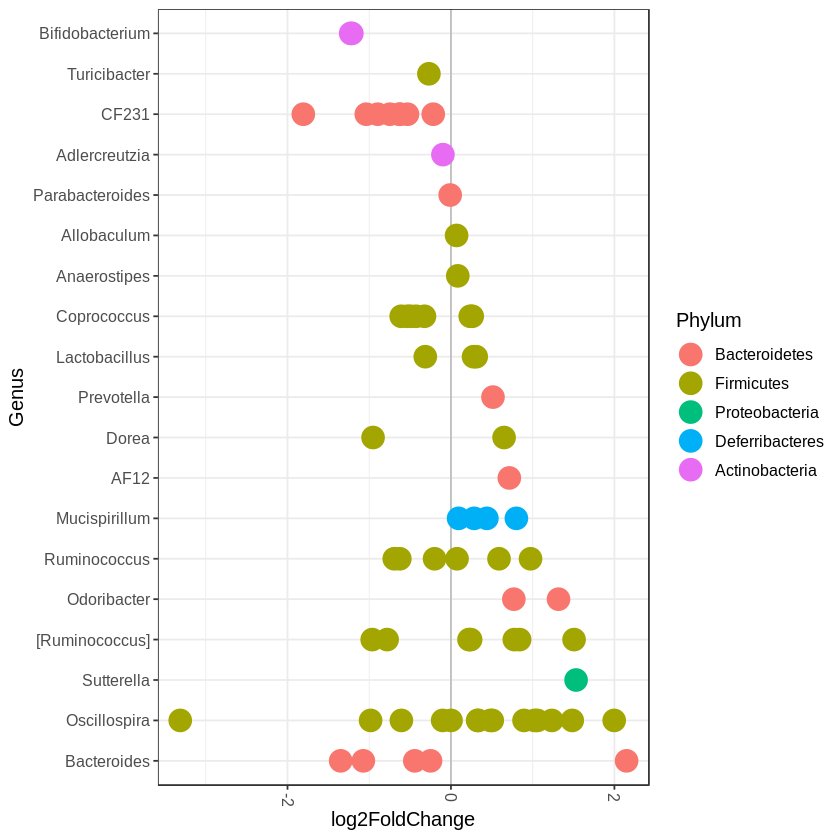

In [19]:
library("ggplot2")
#pdf('~/Desktop/pre_5weeks.pdf', width=32, height=20)
theme_set(theme_bw())
sigtabgen = subset(sigtab, !is.na(Genus)) #Top genus with abs log2fold and p value
# Phylum order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Phylum, function(x) max(x))
x = sort(x, TRUE)
sigtabgen$Phylum = factor(as.character(sigtabgen$Phylum), levels=names(x))
# Genus order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Genus, function(x) max(x))
x = sort(x, TRUE)
sigtabgen$Genus = factor(as.character(sigtabgen$Genus), levels=names(x))
ggplot(sigtabgen, aes(y=Genus, x=log2FoldChange, color=Phylum)) + 
  geom_vline(xintercept = 0.0, color = "gray", size = 0.5) +
  geom_point(size=6) +
  theme(text= element_text(size=12),axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))

## Time 5

In [20]:
gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}
geoMeans = apply(counts(deseq2.time5), 1, gm_mean)
deseq2.time5 = estimateSizeFactors(deseq2.time5, geoMeans = geoMeans)
deseq2.time5 = DESeq(deseq2.time5, fitType="local")

res = results(deseq2.time5)
res = res[order(res$padj, na.last=NA), ]

sigtab = res
#sigtab = res[(res$padj < alpha), ]
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(phy.pt.time5)[rownames(sigtab), ], "matrix"))
sigtab
head(sigtab, contrasts=list("Placebo","Letrozole"))
write.csv(sigtab, "pvl_time5.csv", row.names = TRUE)
res

using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 20 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Kingdom,Phylum,Class,Order,Family,Genus,Species,Rank1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
denovo44661,78.563495,-4.069668,0.9579323,-4.248387,2.153150e-05,0.003111301,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo4701,36.123066,-3.010269,0.7008239,-4.295329,1.744344e-05,0.003111301,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,NA,NA
denovo100756,17.661709,-3.423921,0.8527438,-4.015181,5.940007e-05,0.005722207,Bacteria,Firmicutes,Bacilli,Turicibacterales,Turicibacteraceae,Turicibacter,NA,NA
denovo147899,36.446647,-3.030047,0.7701242,-3.934491,8.337332e-05,0.006023722,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo139763,34.920328,-2.747456,0.7284530,-3.771631,1.621837e-04,0.009374219,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,NA,NA
denovo146153,10.625420,-5.049535,1.3867515,-3.641269,2.712977e-04,0.013067508,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo4763,4.818252,2.446688,0.6967406,3.511619,4.453863e-04,0.015243096,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,NA,NA,NA
denovo135866,3.541467,5.281879,1.5114222,3.494642,4.746985e-04,0.015243096,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo10173,434.875915,2.109775,0.6020376,3.504392,4.576516e-04,0.015243096,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,NA,NA,NA,NA


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Kingdom,Phylum,Class,Order,Family,Genus,Species,Rank1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
denovo44661,78.56349,-4.069668,0.9579323,-4.248387,2.153150e-05,0.003111301,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo4701,36.12307,-3.010269,0.7008239,-4.295329,1.744344e-05,0.003111301,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,NA,NA
denovo100756,17.66171,-3.423921,0.8527438,-4.015181,5.940007e-05,0.005722207,Bacteria,Firmicutes,Bacilli,Turicibacterales,Turicibacteraceae,Turicibacter,NA,NA
denovo147899,36.44665,-3.030047,0.7701242,-3.934491,8.337332e-05,0.006023722,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo139763,34.92033,-2.747456,0.7284530,-3.771631,1.621837e-04,0.009374219,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,NA,NA
denovo146153,10.62542,-5.049535,1.3867515,-3.641269,2.712977e-04,0.013067508,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA


log2 fold change (MLE): Treatment Placebo vs Letrozole 
Wald test p-value: Treatment Placebo vs Letrozole 
DataFrame with 289 rows and 6 columns
              baseMean log2FoldChange     lfcSE         stat       pvalue
             <numeric>      <numeric> <numeric>    <numeric>    <numeric>
denovo44661   78.56349      -4.069668 0.9579323    -4.248387 2.153150e-05
denovo4701    36.12307      -3.010269 0.7008239    -4.295329 1.744344e-05
denovo100756  17.66171      -3.423921 0.8527438    -4.015181 5.940007e-05
denovo147899  36.44665      -3.030047 0.7701242    -3.934491 8.337332e-05
denovo139763  34.92033      -2.747456 0.7284530    -3.771631 1.621837e-04
...                ...            ...       ...          ...          ...
denovo118503  1.741693   0.0533935374 1.3407511  0.039823601    0.9682338
denovo72530   1.256639   0.0276194267 0.8997224  0.030697719    0.9755106
denovo120058 11.012248   0.0112576369 0.8967487  0.012553837    0.9899838
denovo95676   1.749400  -0.0061173334 0.8

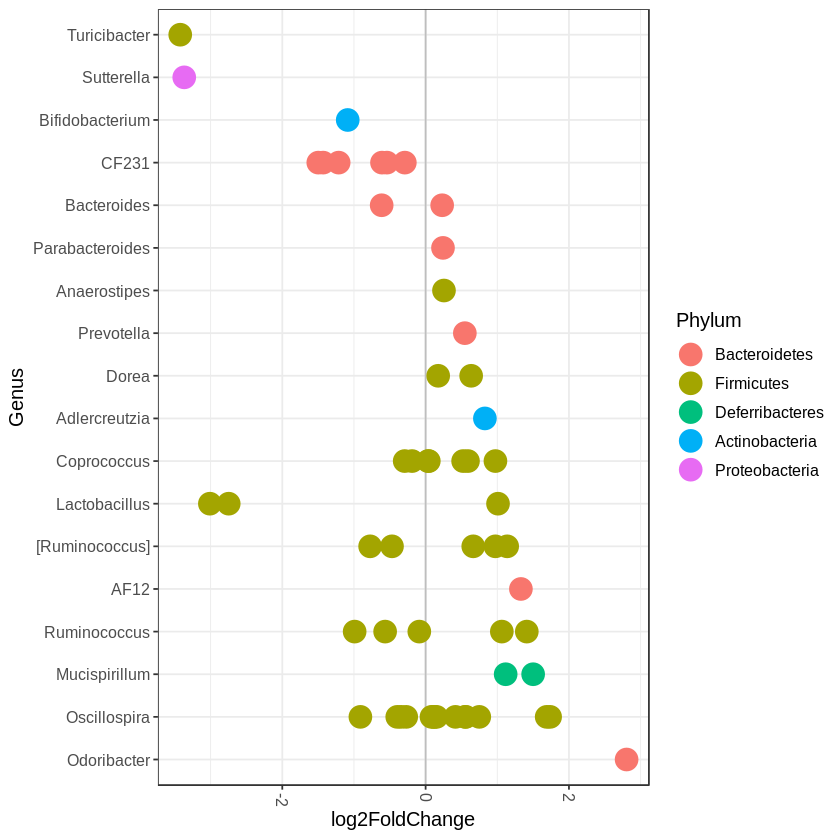

In [21]:
library("ggplot2")
#pdf('~/Desktop/pre_5weeks.pdf', width=32, height=20)
theme_set(theme_bw())
sigtabgen = subset(sigtab, !is.na(Genus)) #Top genus with abs log2fold and p value
# Phylum order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Phylum, function(x) max(x))
x = sort(x, TRUE)
sigtabgen$Phylum = factor(as.character(sigtabgen$Phylum), levels=names(x))
# Genus order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Genus, function(x) max(x))
x = sort(x, TRUE)
sigtabgen$Genus = factor(as.character(sigtabgen$Genus), levels=names(x))
ggplot(sigtabgen, aes(y=Genus, x=log2FoldChange, color=Phylum)) + 
  geom_vline(xintercept = 0.0, color = "gray", size = 0.5) +
  geom_point(size=6) +
  theme(text= element_text(size=12),axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))